# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [83]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [84]:
def f(x):
    return x**2*numpy.sin(x)
    

Ensure your function works with numpy arrays:

In [85]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [86]:
def g(x):
    return (2*x*numpy.sin(x) + (2-x**2)*numpy.cos(x)-2)
    

Check your solution with the same numpy array:

In [87]:
assert g(0) == 0.

In [88]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [89]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)
    # YOUR CODE HERE

Check your analytic function:

In [90]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [91]:
def integrate_numeric(xmin, xmax, N):
    deltax = (xmax-xmin)/N
    xsum =0 
    msum = 0
    w = xmin
    m = xmin + deltax/2
    
    for i in range(0,N):
        xsum += f(w)
        w += deltax
        
    for j in range(0,N):
        msum += f(m)
        m += deltax
        
    ans = (deltax/6) * (4*msum + 2*xsum + f(xmax))
    return ans

Make sure you have implemented Simpson's rule correctly:

In [92]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [93]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,"Errors In Simpson's Rule Approximation of an Integral")

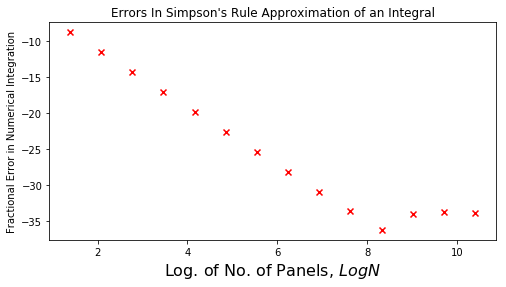

In [128]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384,32768])  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
ys =[]
plt.figure(figsize=(8, 4))
for i in range(len(panel_counts)):
    ys.append(((result_analytic- integrate_numeric(x0, x1, panel_counts[i]))**2)**0.5/result_analytic)

ys2 = numpy.array(ys)    
logys= numpy.log(ys2)
logpanels = numpy.log(panel_counts)
plt.scatter(logpanels, logys, color = 'red', marker = 'x')
plt.xlabel("Log. of No. of Panels, " '$Log{N}$', fontsize = 16)
plt.ylabel("Fractional Error in Numerical Integration")
plt.title("Errors In Simpson's Rule Approximation of an Integral")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the no. of panels increases logarithmically, we see the fractional error decrease logarithmically. when the no. of panels grows too large, (over 5000), we see the fractional error increase again. as the no. of panels is large, the step size in the simpsons rule approximation, $\Delta x$, becomes smaller than the numerical precision of the computer, causing rounding off errors to occur as the values of $x$ are much greater than $\Delta x$

If the trapezium rule was being used, how would the panel
count affect accuracy? 

It would affect the accuracy in a very similar way, however the errors in the trapezium rule would not fall as fast as a function of the Panel count